In [1]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 1.0}
figure = {'figsize' : [10.0, 10/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
from scipy.signal import find_peaks

In [2]:
wave_lenghts_measured = [587, 675, 681]
pixel_measured = [279, 675, 681]
tabular_wl = [253.65, 576.96, 579.07]

data = {'Measured':[193, 279, 587, 675, 681, 1029, 1231],
        'Tabular':[404.66, 435.833, 546.08, 576.96, 579.07, 707.70, 758.93],
       'WL':[193, 279, 587, 675, 681, 1029, 1231]}
 
# Create DataFrame
df = pd.DataFrame(data)
df.head()

,Measured,Tabular,WL
0,193,404.660,193
1,279,435.833,279
2,587,546.080,587
3,675,576.960,675
4,681,579.070,681


In [3]:
from lmfit import Model, Parameters

def fir_order(pixel, c0, c1):
    return c0 + c1*pixel

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'c1']
independent variables: ['pixel']


In [4]:
from lmfit import Model, Parameters

def sec_order(pixel, c0, c1, c2):
    return c0 + c1*pixel + c2*pixel**2

mod = Model(sec_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'c1', 'c2']
independent variables: ['pixel']


In [5]:
params = mod.make_params(c0=0, c1=1)
result = mod.fit(df['Tabular'], params, pixel=df['Measured'])

print(result.fit_report(min_correl=0.25))
#dic_result = result.params.valuesdict()
#print(dic_result)
#c1 = dic_result['c1']
#c2 = dic_result['c2']

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [6]:
params = mod.make_params(c0=0, c1=1, c2=0)
result = mod.fit(df['Tabular'], params, pixel=df['Measured'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
#print(dic_result)
c0 = dic_result['c0']
c1 = dic_result['c1']
c2 = dic_result['c2']

[[Model]]
    Model(sec_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 7
    # variables        = 3
    chi-square         = 115.334813
    reduced chi-square = 28.8337034
    Akaike info crit   = 25.6135042
    Bayesian info crit = 25.4512346
[[Variables]]
    c0:  328.918621 +/- 8.08885445 (2.46%) (init = 0)
    c1:  0.39134373 +/- 0.02607878 (6.66%) (init = 1)
    c2: -3.1045e-05 +/- 1.8055e-05 (58.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.250)
    C(c1, c2) = -0.974
    C(c0, c1) = -0.925
    C(c0, c2) =  0.837


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


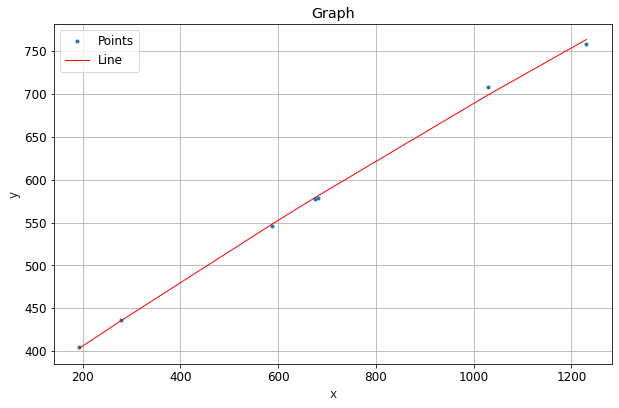

In [7]:
x = df['WL']
y = c2*x**2+c1*x+c0

y2 = df["Tabular"]
plt.plot(x, y2, '.', label='Points')
plt.plot(x, y, 'r', label="Line")
plt.title('Graph')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [8]:
file_uncal = '12_04_2022/hgaruncall1204.Master.Scope'
df1 = pd.read_csv(file_uncal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df1.columns = ['Pixel','Intensity(counts)']
df1.head() # preview the first few rows

file_cal = '12_04_2022/hgar1204.Master.Scope'
df2 = pd.read_csv(file_cal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df2.columns = ['Pixel','Intensity(counts)']
df2.head() # preview the first few rows

,Pixel,Intensity(counts)
0,332.37,0.0
1,332.75,41.0
2,333.12,41.0
3,333.50,41.0
4,333.87,37.0


KeyError: 'Intensity(counts)'

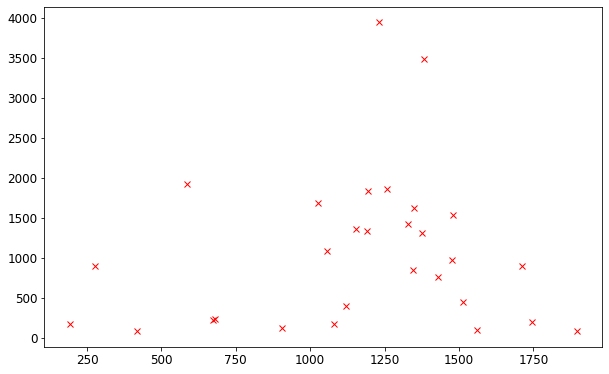

In [9]:
peaks1, _ = find_peaks(df1["Intensity(counts)"], prominence=50)
plt.plot(peaks1, df1['Intensity(counts)'][peaks1], "xr"); plt.plot(df["Intensity(counts)"]); plt.legend(['prominence'])
plt.show()

In [10]:
peaks1_float = []
for i in peaks1:
    peaks1_float.append(float(df1['Pixel'][i]))
    
print(peaks1_float)

[193.0, 279.0, 418.0, 587.0, 675.0, 681.0, 906.0, 1027.0, 1057.0, 1081.0, 1120.0, 1154.0, 1191.0, 1194.0, 1232.0, 1259.0, 1329.0, 1347.0, 1350.0, 1378.0, 1382.0, 1430.0, 1476.0, 1481.0, 1513.0, 1560.0, 1712.0, 1746.0, 1897.0]


KeyError: 'Intensity(counts)'

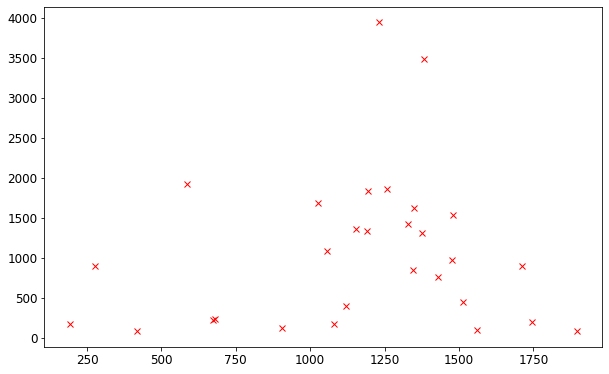

In [11]:
peaks2, _ = find_peaks(df2["Intensity(counts)"], prominence=50)
plt.plot(peaks2, df2['Intensity(counts)'][peaks2], "xr"); plt.plot(df["Intensity(counts)"]); plt.legend(['prominence'])
plt.show()

In [12]:
peaks2_float = []
for i in peaks2:
    peaks2_float.append(float(df2['Pixel'][i]))
    
print(peaks2_float)

[403.6, 435.05, 485.28, 545.29, 576.07, 578.15, 655.23, 695.73, 705.67, 713.59, 726.39, 737.5, 749.52, 750.49, 762.76, 771.44, 793.76, 799.46, 800.4, 809.23, 810.49, 825.52, 839.82, 841.37, 851.24, 865.64, 911.4, 921.46, 965.38]


Calibração 1

In [13]:
from lmfit import Model, Parameters

def sec_order(pixel, c0, c1, c2):
    return c0 + c1*pixel + c2*pixel**2

mod = Model(sec_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'c1', 'c2']
independent variables: ['pixel']


In [14]:
params = mod.make_params(c0=0, c1=1, c2=0)
result = mod.fit(peaks2_float, params, pixel = peaks1_float)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
#print(dic_result)
c0 = dic_result['c0']
c1 = dic_result['c1']
c2 = dic_result['c2']

[[Model]]
    Model(sec_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 29
    # variables        = 3
    chi-square         = 0.91318104
    reduced chi-square = 0.03512235
    Akaike info crit   = -94.2853918
    Bayesian info crit = -90.1835043
[[Variables]]
    c0:  330.746690 +/- 0.17342046 (0.05%) (init = 0)
    c1:  0.37993009 +/- 3.4828e-04 (0.09%) (init = 1)
    c2: -2.3796e-05 +/- 1.6575e-07 (0.70%) (init = 0)
[[Correlations]] (unreported correlations are < 0.250)
    C(c1, c2) = -0.971
    C(c0, c1) = -0.916
    C(c0, c2) =  0.808


tabular_peaks = [404.656, 435.833, 546.074, 579.066, ]

peaks2_float

In [15]:
from lmfit import Model, Parameters

def sec_order(pixel, c0, c1, c2):
    return c0 + c1*pixel + c2*pixel**2

mod = Model(sec_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'c1', 'c2']
independent variables: ['pixel']


In [16]:
file_uncal = '12_04_2022/hydro1204.Master.Scope'
df3 = pd.read_csv(file_uncal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df3.columns = ['Pixel','Intensity(counts)']
df3.head() # preview the first few rows

,Pixel,Intensity(counts)
0,331.08,0.0
1,331.46,39.0
2,331.84,36.0
3,332.22,41.0
4,332.60,43.0


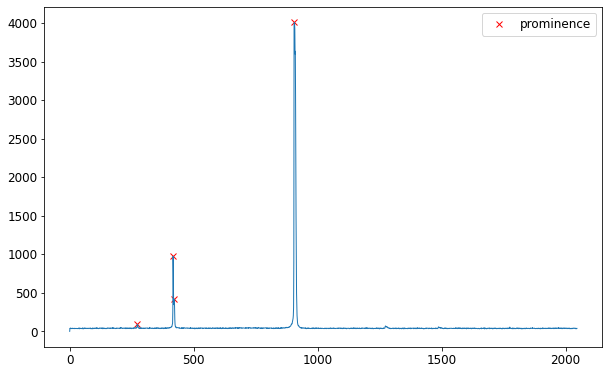

In [17]:
peaks3, _ = find_peaks(df3["Intensity(counts)"], prominence=50)
plt.plot(peaks3, df3['Intensity(counts)'][peaks3], "xr"); plt.plot(df3["Intensity(counts)"]); plt.legend(['prominence'])
plt.show()

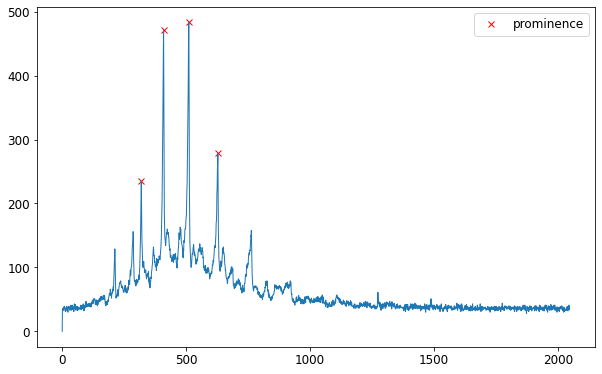

In [18]:
file_uncal = '12_04_2022/co21204.Master.Scope'
df4 = pd.read_csv(file_uncal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df4.columns = ['Pixel','Intensity(counts)']
df4.head() # preview the first few rows
peaks4, _ = find_peaks(df4["Intensity(counts)"], prominence=100)
plt.plot(peaks4, df4['Intensity(counts)'][peaks4], "xr"); plt.plot(df4["Intensity(counts)"]); plt.legend(['prominence'])
plt.show()

In [19]:
print(df4['Pixel'][peaks4])

319    449.83
409    482.46
511    518.97
628    560.24
Name: Pixel, dtype: float64


In [20]:
peaks4_float = []
for i in peaks4:
    peaks4_float.append(float(df4['Pixel'][i]))
    
print(peaks4_float)
for i in peaks4_float:
    print(1/(i*1e-7))

[449.83, 482.46, 518.97, 560.24]
22230.620456616944
20727.106910417446
19268.93654739195
17849.493074396687


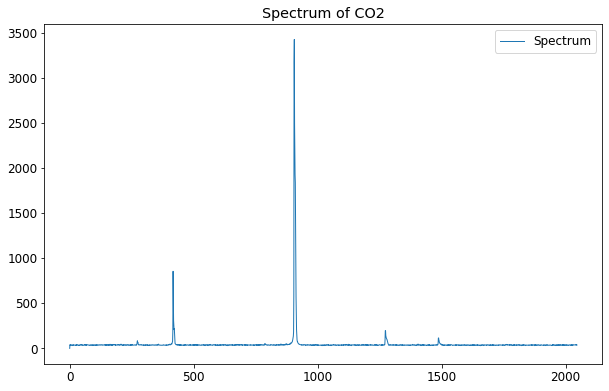

In [21]:
file_uncal = '12_04_2022/h2o1204_secondtry.Master.Scope'
df4 = pd.read_csv(file_uncal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df4.columns = ['Pixel','Intensity(counts)']
#df4.head() # preview the first few rows
#peaks4, _ = find_peaks(df4["Intensity(counts)"], prominence=100)
#plt.plot(peaks4, df4['Intensity(counts)'][peaks4], "xr"); 
plt.plot(df4["Intensity(counts)"]); plt.legend(['Spectrum']) ; plt.title("Spectrum of CO2")
plt.show()

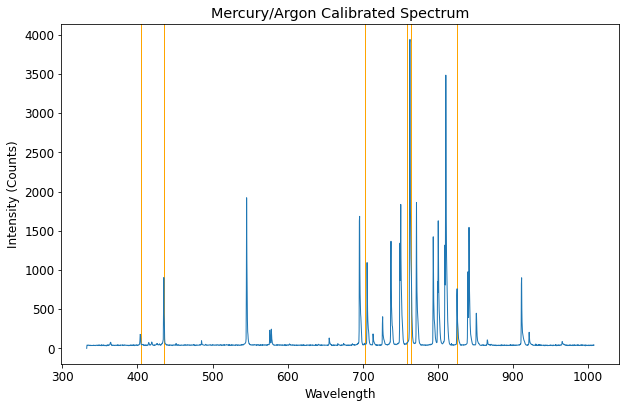

In [32]:
file_uncal = '12_04_2022/hgar1204.Master.Scope'
df4 = pd.read_csv(file_uncal,sep='\t', skiprows = 19) # DataFrame segundo Pandasdf
df4.columns = ['Wavelength','Intensity(counts)']
df4.head() # preview the first few rows
#peaks4, _ = find_peaks(df4["Intensity(counts)"], prominence=100)
#plt.plot(peaks4, df4['Intensity(counts)'][peaks4], "xr");  x = 7, color = 'b', label = 'axvline - full height'
lista_calib = [763.51, 824.89, 435.833, 404.656, 758.93, 702.89]
for i in range(len(lista_calib)):
    plt.axvline(x = lista_calib[i], color = 'orange', linestyle = '-')
plt.plot(df4["Wavelength"],df4["Intensity(counts)"]); plt.title("Mercury/Argon Calibrated Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity (Counts)")
plt.show()